In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv


In [2]:
df=pd.read_csv('/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [3]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
#Data preposcessing

In [6]:
df.isna()
print(df.isna().sum)
df_copy = df.copy()


<bound method NDFrame._add_numeric_operations.<locals>.sum of        index   Date   Year  Month  Customer Age  Customer Gender  Country  \
0      False  False  False  False         False            False    False   
1      False  False  False  False         False            False    False   
2      False  False  False  False         False            False    False   
3      False  False  False  False         False            False    False   
4      False  False  False  False         False            False    False   
...      ...    ...    ...    ...           ...              ...      ...   
34862  False  False  False  False         False            False    False   
34863  False  False  False  False         False            False    False   
34864  False  False  False  False         False            False    False   
34865  False  False  False  False         False            False    False   
34866  False   True   True   True          True             True     True   

       State 

In [7]:
df_copy[df_copy.duplicated()]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1


In [8]:
df_copy=df_copy.dropna(subset=['Date'])
df_copy=df_copy.drop('Column1', axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34866 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.3+ MB


In [9]:
df_copy['Margin']=df_copy['Revenue']-df_copy['Cost']
df_copy['Unit_Margin']=df_copy['Unit Price']-df_copy['Unit Cost']
df_copy["Date"] = pd.to_datetime(df_copy["Date"])
df_copy['Year_Month'] = df_copy['Date'].dt.strftime('%Y-%m')

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34866 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  float64       
 3   Month             34866 non-null  object        
 4   Customer Age      34866 non-null  float64       
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  float64       
 14  Revenue           3486

In [11]:
print('countries')
print(df_copy['Country'].unique())
print('State')
print(df_copy['State'].unique())
print('Products')
print(df_copy['Product Category'].unique())
print('Sub categories')
print(df_copy['Sub Category'].unique())

countries
['United States' 'France' 'United Kingdom' 'Germany']
State
['Washington' 'California' 'Oregon' 'Essonne' 'Yveline' 'England' 'Hessen'
 'Hamburg' 'Seine Saint Denis' 'Saarland' 'Nordrhein-Westfalen' 'Bayern'
 'Seine (Paris)' 'Pas de Calais' 'Moselle' 'Hauts de Seine' 'Nord'
 'Seine et Marne' 'Loiret' 'Charente-Maritime' 'Loir et Cher'
 'Brandenburg' 'Alabama' "Val d'Oise" 'Val de Marne' 'Minnesota' 'Wyoming'
 'Ohio' 'Garonne (Haute)' 'Kentucky' 'Texas' 'Missouri' 'Somme' 'New York'
 'Florida' 'Illinois' 'South Carolina' 'North Carolina' 'Georgia'
 'Virginia' 'Mississippi' 'Montana' 'Arizona' 'Massachusetts' 'Utah']
Products
['Accessories' 'Clothing' 'Bikes']
Sub categories
['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts']


In [12]:
df_copy.groupby('Year')['Revenue'].sum()

Year
2015.0     9947771.0
2016.0    12396805.0
Name: Revenue, dtype: float64

Country
France             3446104.0
Germany            4244510.0
United Kingdom     4276220.0
United States     10377742.0
Name: Revenue, dtype: float64


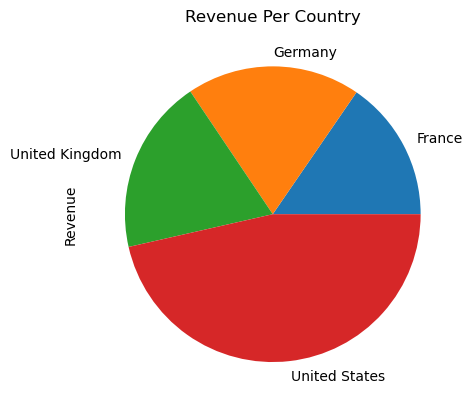

In [13]:
country_spending_habits=df_copy.groupby('Country')['Revenue'].sum()
print(country_spending_habits)
#Add Title
country_spending_habits.plot(kind="pie", y= "Revenue")
plt.title("Revenue Per Country")


# Show the chart
plt.show()

                         Revenue
Country        Year             
United States  2016.0  5642334.0
               2015.0  4735408.0
Germany        2016.0  2471187.0
United Kingdom 2016.0  2381753.0
France         2016.0  1901531.0
United Kingdom 2015.0  1894467.0
Germany        2015.0  1773323.0
France         2015.0  1544573.0


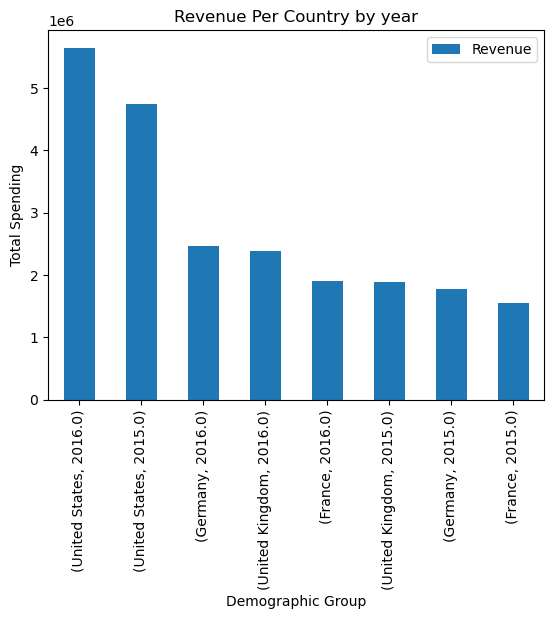

In [14]:
# Create a bar chart of the top spending categories grouped by year and country
country_spending_habits_year=df_copy.groupby(['Country',"Year"]).agg({"Revenue": "sum"})

print(country_spending_habits_year.sort_values(by="Revenue", ascending=False))
#Add Title
spending_habits_by_year=country_spending_habits_year.sort_values(by="Revenue", ascending=False)
spending_habits_by_year.plot(kind="bar")
plt.title("Revenue Per Country by year")
#Bar Chart showing number of items sold and revenue
plt.xlabel("Demographic Group")
plt.ylabel("Total Spending")

# Show the chart
plt.show()

In [15]:
# Group the data by demographics columns and calculate the total spending
spending_by_demographics = df_copy.groupby(["Country","Product Category"]).agg({"Revenue": "sum"})

# Print the top spending categories by demographic group
print(spending_by_demographics.sort_values(by="Revenue", ascending=False))

                                   Revenue
Country        Product Category           
United States  Bikes             4733208.0
               Accessories       3723029.0
Germany        Bikes             2465427.0
United Kingdom Bikes             2415117.0
United States  Clothing          1921505.0
France         Bikes             1872603.0
United Kingdom Accessories       1309048.0
Germany        Accessories       1289410.0
France         Accessories       1099177.0
United Kingdom Clothing           552055.0
Germany        Clothing           489673.0
France         Clothing           474324.0


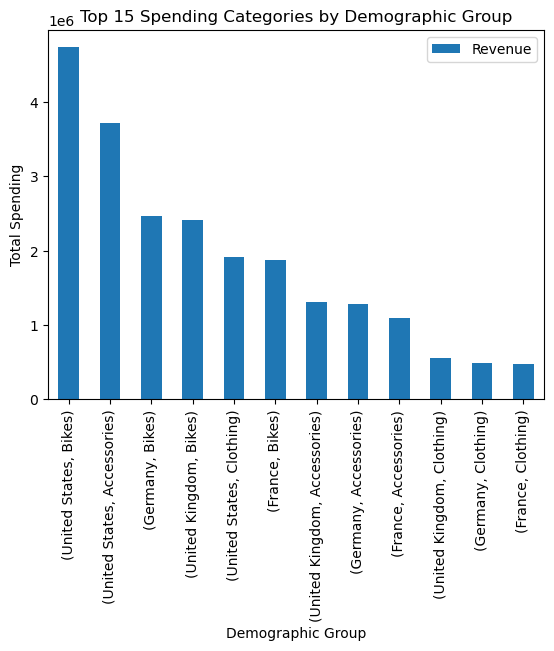

In [16]:
top_spending = spending_by_demographics.sort_values(by="Revenue", ascending=False).head(15)

# Create a bar chart of the top spending categories by demographic group
top_spending.plot(kind="bar")

# Add a title and labels to the chart
plt.title("Top 15 Spending Categories by Demographic Group")
plt.xlabel("Demographic Group")
plt.ylabel("Total Spending")

# Show the chart
plt.show()